2023-05-30 07:45:25.767355: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         0.0|  2.579e-01|  1.461e-01|           19145|     6.761e-02|     3.513e-02|               4604|   1.901e-02|   9.827e-03|             1288|      6.036e+02|
|--------------------------------------------------------------------------------------------------------------------------------------------

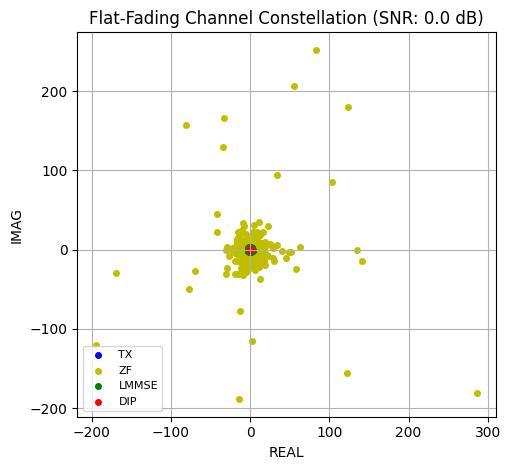

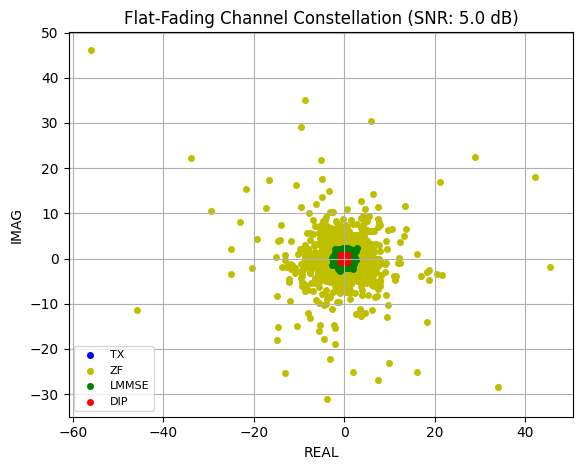

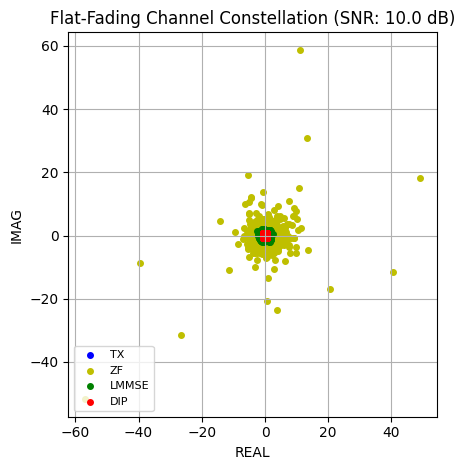

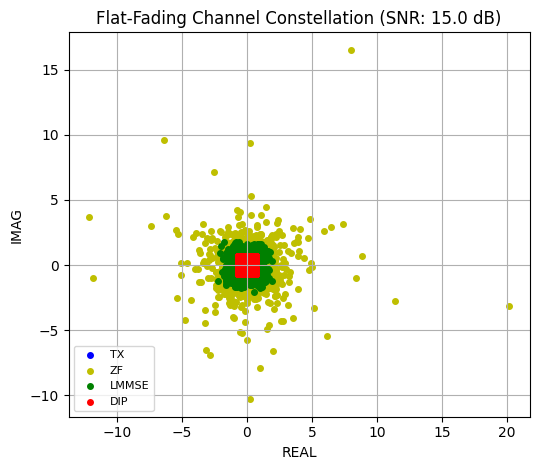

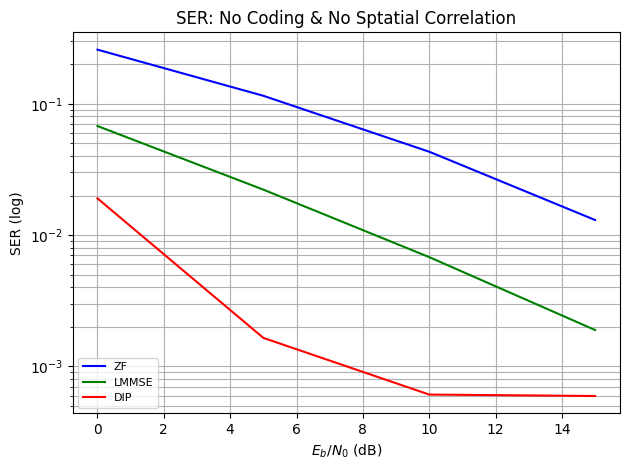

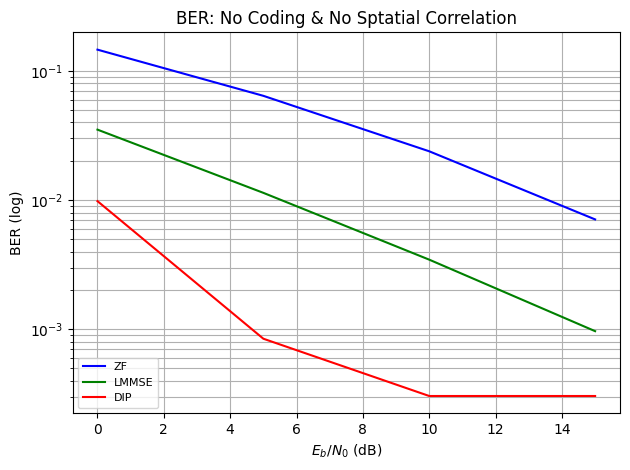

(array([ 0.,  5., 10., 15.]),
 array([0.25794983, 0.11488342, 0.04309082, 0.01301575]),
 array([0.06761169, 0.02217102, 0.00679016, 0.00189209]),
 array([0.01901245, 0.00164795, 0.00061035, 0.00059509]))

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from NCodeNCorr import ncodencorr

Block_Length = 512         # Block Length (k)
NUM_BITS_PER_SYMBOL = 2    # Mapping: 4QAM
CONSTELLATION_TYPE = "qam" #
DEMAPPING_METHOD = "app"   # Demapping Method: "app"
NUM_TX_ANT = 8             # Transmit Antennas
NUM_RX_ANT = 8             # Receive Antennas

NUM_DATA_GROUP = 1         # Number of Data Group
BATCH_SIZE = 32            # Number of Parallelly Processed Batches
EBN0_DB_MIN = 0.0          # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 15.0         # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 4        # EBNO Points

model_ncodencorr = ncodencorr(Block_Length, 
                              NUM_BITS_PER_SYMBOL,
                              CONSTELLATION_TYPE,
                              DEMAPPING_METHOD,
                              NUM_RX_ANT,
                              NUM_TX_ANT)

model_ncodencorr(NUM_DATA_GROUP,
                 BATCH_SIZE,
                 EBN0_DB_MIN,
                 EBN0_DB_MAX,
                 NUM_EBN0_POINTS)